## 导入相关包

In [1]:
import pandas as pd
import numpy as np

## 读取全部数据

In [3]:
train_data = pd.read_csv('train150.csv',nrows=None)
# test_data = pd.read_csv('test_all.csv',nrows=None)

## 获取训练和测试数据

In [4]:
features_columns = [col for col in train_data.columns if col not in ['user_id','label']]
train = train_data[features_columns].values
# test = test_data[features_columns].values
target =train_data['label'].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)

from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0.0: 146955, 1.0: 9563})
Counter({0.0: 97957, 1.0: 6389})


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [7]:
X_train1, y_train1 = SMOTETomek().fit_sample(X_train, y_train)
print(Counter(y_train))
print(Counter(y_train1))

Counter({0.0: 146955, 1.0: 9563})
Counter({0.0: 145435, 1.0: 145435})


In [8]:
# 将数据矩阵转化为二维矩阵来可视化采样效果，这里用了PCA会快，可以用T-SNE降维可视化效果更好，但是很慢
X_vis=PCA(n_components=2).fit_transform(X_train)
X_vis2=PCA(n_components=2).fit_transform(X_train1)

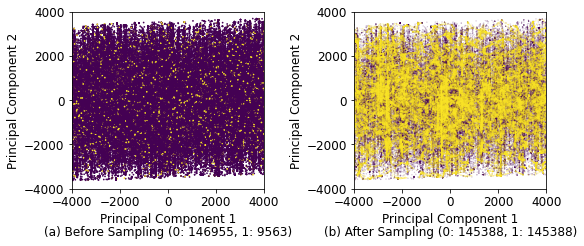

In [9]:
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize=[8, 3.5])

plt.subplot(121)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.yaxis.set_major_locator(MultipleLocator(2000))
plt.scatter(X_vis[:,0],X_vis[:,1],s=0.5,c=y_train)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principal Component 2",fontsize=12)
plt.xlim([-4000, 4000])
plt.ylim([-4000, 4000])
plt.title('(a) Before Sampling (0: 146955, 1: 9563)',fontsize=12,y=-0.3)
plt.tight_layout()

plt.subplot(122)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.yaxis.set_major_locator(MultipleLocator(2000))
plt.scatter(X_vis2[:,0],X_vis2[:,1],s=0.01,c=y_train1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principal Component 2",fontsize=12)
plt.xlim([-4000, 4000])
plt.ylim([-4000, 4000])
plt.title('(b) After Sampling (0: 145388, 1: 145388)',fontsize=12,y=-0.3)
plt.tight_layout()

plt.savefig('Combined Sampling (Smote+Tomek).tif', bbox_inches='tight',format='tiff', dpi=400)

In [10]:
# 后面要跑很多分类器，先清一下内存
del SMOTETomek, PCA, X_vis, X_vis2, train, train_data

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

import time

In [12]:
#前4个不用标准化，后4个要标准化
clf_name = ["Isolation Forest", "Random Forest", "GBDT", "AdaBoost", "CART", "Logistic Regression", "SVM (Linear)", "SVM (Radial)", "Naive Bayes"]

clf_list = [
    IsolationForest(n_jobs=-1),
    RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, n_jobs=-1, random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    LinearSVC(), # SVM (Linear)
    SVC(max_iter=1000), # SVM(Radial) , kernel = "rbf"
    GaussianNB()
]

In [13]:
y_hat_Before = dict()
y_score_Before = dict()
Score_Before = np.zeros((9, 5))
fpr_Before = dict()
tpr_Before = dict()

y_hat_After = dict()
y_score_After = dict()
Score_After = np.zeros((9, 5))
fpr_After = dict()
tpr_After = dict()

Score_Before_Sampling

In [14]:
for i in range(5):
    clf = clf_list[i]
    time_start=time.time()
    y_hat_Before[i] = clf.fit(X_train, y_train).predict(X_test)
    if i ==0:
        y_score_Before[i] = clf.fit(X_train, y_train).decision_function(X_test)
    else:
        y_score_Before[i] = clf.fit(X_train, y_train).predict_proba(X_test) # print(clf.classes) 对应predict_proba的各类概率的顺序
    time_end=time.time()
    print(clf_name[i], time_end-time_start) #查看循环进度

Isolation Forest 71.16671347618103
Random Forest 258.05793952941895
GBDT 523.4497351646423
AdaBoost 319.83401370048523
CART 270.0421681404114


In [15]:
X_train2 = StandardScaler().fit_transform(X_train)
X_test2 = StandardScaler().fit_transform(X_test)

for i in range(5, 9):
    clf = clf_list[i]
    time_start=time.time()
    y_hat_Before[i] = clf.fit(X_train2, y_train).predict(X_test2)
    if i ==8:
        y_score_Before[i] = clf.fit(X_train2, y_train).predict_proba(X_test2)
    else:
        y_score_Before[i] = clf.fit(X_train2, y_train).decision_function(X_test2)
    # print(clf.classes) 对应predict_proba的各类概率的顺序
    time_end=time.time()
    print(clf_name[i], time_end-time_start)

Logistic Regression 7.571715354919434
SVM (Linear) 221.81285095214844
SVM (Radial) 227.99738883972168
Naive Bayes 2.454462766647339


e:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
e:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
e:\python38\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
e:\python38\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [16]:
for i in range(9):
    Score_Before[i][0] = accuracy_score(y_test, y_hat_Before[i])
    Score_Before[i][1] = precision_score(y_test, y_hat_Before[i], average='macro')
    Score_Before[i][2] = recall_score(y_test, y_hat_Before[i], average='macro')
    Score_Before[i][3] = f1_score(y_test, y_hat_Before[i], average='macro')
    if i in [0, 5, 6, 7]:
        fpr_Before[i], tpr_Before[i], thresholds = roc_curve(y_test, y_score_Before[i])
    else:
        fpr_Before[i], tpr_Before[i], thresholds = roc_curve(y_test, y_score_Before[i][:,1], pos_label=1) # pos_label=感兴趣的类标签
    Score_Before[i][4] = auc(fpr_Before[i], tpr_Before[i])

e:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score_After_Sampling

In [17]:
for i in range(1, 5):
    clf = clf_list[i]
    time_start=time.time()
    y_hat_After[i] = clf.fit(X_train1, y_train1).predict(X_test)
    y_score_After[i] = clf.fit(X_train1, y_train1).predict_proba(X_test) # print(clf.classes) 对应predict_proba的各类概率的顺序
    time_end=time.time()
    print(clf_name[i], time_end-time_start) #查看循环进度

Random Forest 295.64610266685486
GBDT 1156.5847373008728
AdaBoost 677.9183964729309
CART 159.1707649230957


In [18]:
X_train2 = StandardScaler().fit_transform(X_train1)

for i in range(5, 9):
    clf = clf_list[i]
    time_start=time.time()
    y_hat_After[i] = clf.fit(X_train2, y_train1).predict(X_test2)
    if i == 8:
        y_score_After[i] = clf.fit(X_train2, y_train1).predict_proba(X_test2) # print(clf.classes) 对应predict_proba的各类概率的顺序
    else:
        y_score_After[i] = clf.fit(X_train2, y_train1).decision_function(X_test2)
    time_end=time.time()
    print(clf_name[i], time_end-time_start)

e:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Logistic Regression 16.496417999267578
SVM (Linear) 422.77326345443726
SVM (Radial) 345.80531334877014
Naive Bayes 3.49166202545166


In [19]:

for i in range(1, 9):
    Score_After[i][0] = accuracy_score(y_test, y_hat_After[i])
    Score_After[i][1] = precision_score(y_test, y_hat_After[i], average='macro')
    Score_After[i][2] = recall_score(y_test, y_hat_After[i], average='macro')
    Score_After[i][3] = f1_score(y_test, y_hat_After[i], average='macro')
    if i in [5, 6, 7]:
        fpr_After[i], tpr_After[i], thresholds = roc_curve(y_test, y_score_After[i])
    else:
        fpr_After[i], tpr_After[i], thresholds = roc_curve(y_test, y_score_After[i][:,1], pos_label=1)
    Score_After[i][4] = auc(fpr_After[i], tpr_After[i])

In [20]:
def df_out(Score_):
    Classifier_Score = pd.DataFrame(Score_, columns=['Accuracy', 'Precision', 'Recall', 'F1 (Macro)', 'AUC'])
    #DataFrame指定位置插入列的方法
    col_name = Classifier_Score.columns.tolist()
    col_name.insert(0,'Classifier')
    Classifier_Score = Classifier_Score.reindex(columns=col_name)
    Classifier_Score['Classifier'] = pd.Series(clf_name)
    print(Classifier_Score)
    return Classifier_Score

df_out(Score_Before).to_csv('Score_Before.csv',header=True,index=None)
df_out(Score_After).to_csv('Score_After.csv',header=True,index=None)

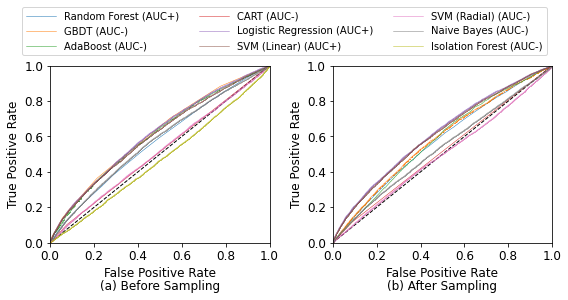

In [90]:
# plt.style.use(['science','ieee'])

def PlotROC(fpr, tpr,which):
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("False Positive Rate",fontsize=12)
    plt.ylabel("True Positive Rate",fontsize=12)

    for i in which:
        if (Score_Before[i][4]-Score_After[i][4])<0 and i!=4:
            labels = clf_name[i]+' (AUC+)'
        else:
            labels = clf_name[i]+' (AUC-)'
        plt.plot(fpr[i],tpr[i],label=labels, lw=0.5, marker='.',markersize=0.02)
    # plt.legend()

fig = plt.figure(figsize=[8, 3.5])
axes = fig.subplots(nrows=1, ncols=2)
plt.subplot(121)
PlotROC(fpr_Before, tpr_Before,[1, 2, 3, 4, 5, 6, 7, 8, 0])
plt.title('(a) Before Sampling',fontsize=12,y=-0.3)
plt.tight_layout()

plt.subplot(122)
PlotROC(fpr_After, tpr_After,range(1, 9))
plt.title('(b) After Sampling',fontsize=12,y=-0.3)
plt.tight_layout()
lines, labels = fig.axes[0].get_legend_handles_labels()
# fig.legend(lines, labels, loc = 'upper center')
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.19),frameon=True, loc='upper center',ncol=3,handlelength=3)
plt.savefig('ROCCurve.tif', bbox_inches='tight',format='tiff', dpi=400) #先存后show，否则存为空白新图片
plt.show()

In [93]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,y=-0.9)
    tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    # plt.colorbar(orientation='horizontal')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
# color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True')
    plt.xlabel('Predict')
    plt.tight_layout()

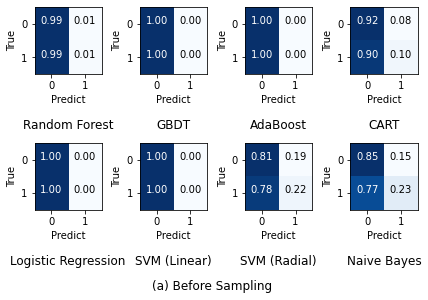

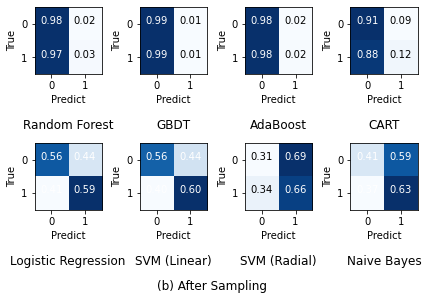

In [94]:
# plt.style.use('ieee')

for i in range(1, 9):
    plt.subplot(2,4,i)
    cnf_matrix = confusion_matrix(y_test, y_hat_Before[i])
    plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True, title=clf_name[i])
plt.suptitle('(a) Before Sampling', fontsize=12,y=-0.005)
plt.savefig('ConfusionMatricesBefore.tif', bbox_inches='tight',format='tiff', dpi=400)
plt.show()

for i in range(1, 9):
    plt.subplot(2,4,i)
    cnf_matrix = confusion_matrix(y_test, y_hat_After[i])
    plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True, title=clf_name[i])
plt.suptitle('(b) After Sampling', fontsize=12,y=-0.005)
plt.savefig('ConfusionMatricesAfter.tif', bbox_inches='tight',format='tiff', dpi=400)
plt.show()

In [134]:
# Rank Averaging
Score_AVG = (2*y_score_Before[2][:,1] + y_score_Before[5])/3
fpr, tpr, thresholds = roc_curve(y_test, Score_AVG, pos_label=1)
auc(fpr, tpr)

0 LogisticRegression()
val auc Score: 0.584744
1 GradientBoostingClassifier()
val auc Score: 0.500000
Linear stretch of predictions to [0,1]
blend result
val auc Score: 0.584744


e:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result